<font size="6">**Import Libraries**</font>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

<font size="6">Image Data Preprocessing </font>


In [2]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

In [3]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [4]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [5]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [6]:
Target_label = normal_label + stroke_label
len(Target_label)

2501

In [7]:
x = np.array(data)
y = np.array(Target_label)

<font size="6">Split Data to Training and Test Sets</font>


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


In [9]:
x_train_s = x_train/255
x_test_s = x_test/255

<font size="6">Sample Data Visualization</font>


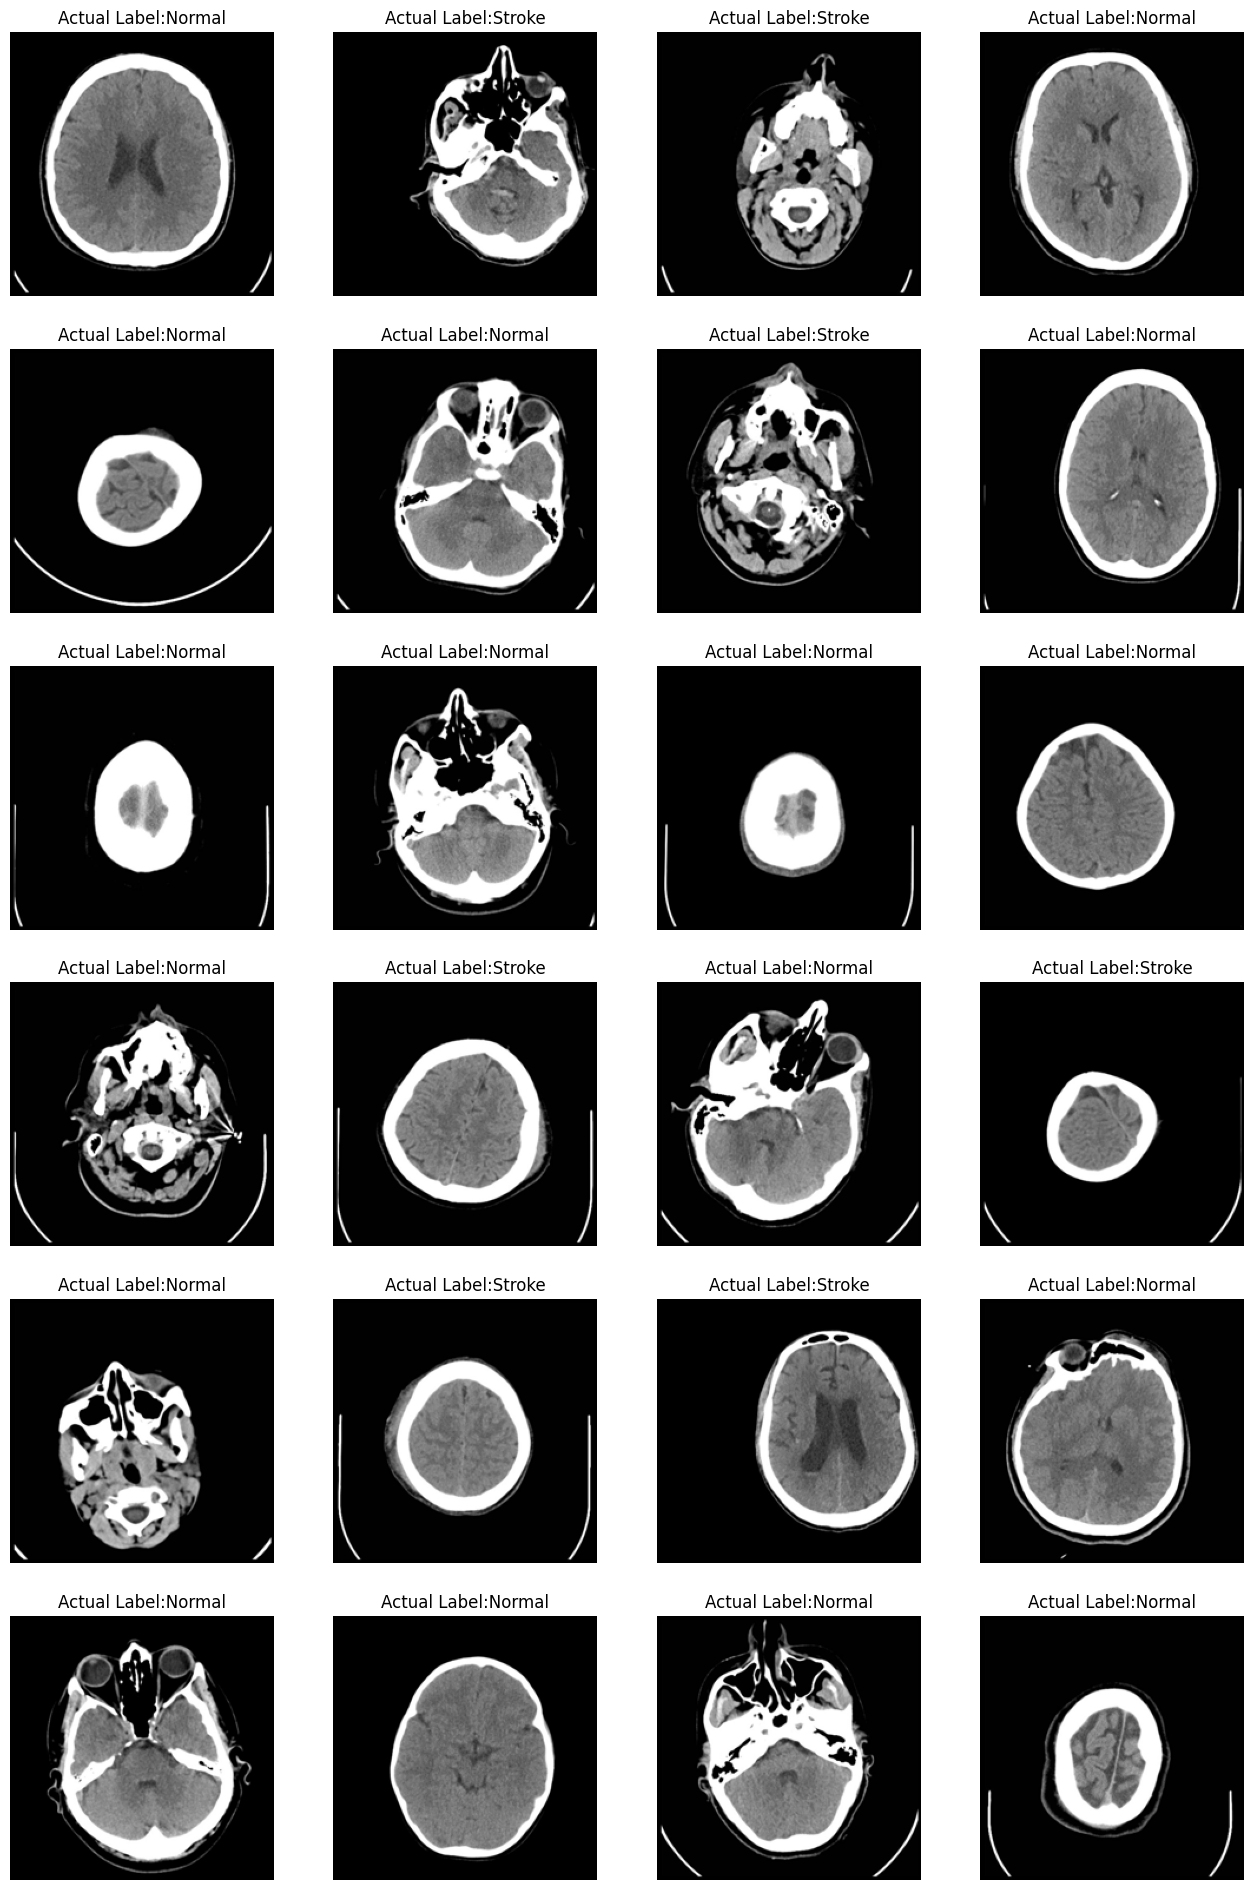

In [10]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

<font size="6">CNN Model Structure</font>


In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128,kernel_size=(3,3),strides=1,padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,277,697 (84.98 MB)

 Trainable params: 22,277,697 (84.98 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train_s,y_train,batch_size=32,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10


I0000 00:00:1728044484.436615     106 service.cc:145] XLA service 0x7c78f8003cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728044484.436698     106 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728044484.436705     106 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/71 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5642 - loss: 1.1099 

I0000 00:00:1728044492.261480     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.6031 - loss: 0.7828 - val_accuracy: 0.7689 - val_loss: 0.4702
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7725 - loss: 0.4643 - val_accuracy: 0.9562 - val_loss: 0.1648
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9346 - loss: 0.1795 - val_accuracy: 0.9602 - val_loss: 0.0872
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9819 - loss: 0.0567 - val_accuracy: 0.9880 - val_loss: 0.0502
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9920 - val_loss: 0.0169
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9898 - loss: 0.0203 - val_accuracy: 0.9721 - val_loss: 0.0542
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9951 - loss: 0.0187 - val_accuracy: 0.9960 - val_loss: 0.0178
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9931 - loss: 0.0303 - val_accuracy: 0.9920 - val_loss: 

<font size="6">Model Evaluation on Train and Test sets</font>


In [20]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Set:",loss)
print("Accuracy on Test Set:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Set:",loss)
print("Accuracy on Train Set:",acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0058  
Loss on Test Set: 0.00431433180347085
Accuracy on Test Set: 1.0
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 5.2578e-04
Loss on Train Set: 0.00050237902905792
Accuracy on Train Set: 1.0


In [14]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [15]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 1 0 0 0 0 0 0]
Predicted Label: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


<font size="6">Metrics Evaluation On Test Set</font>


In [21]:
print("-----Metrics Evaluation On Test Set -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Set -----

Confusion Matrix:
 [[165   0]
 [  0  86]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        86

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



<font size="6">Image Predictions on Test Set</font>



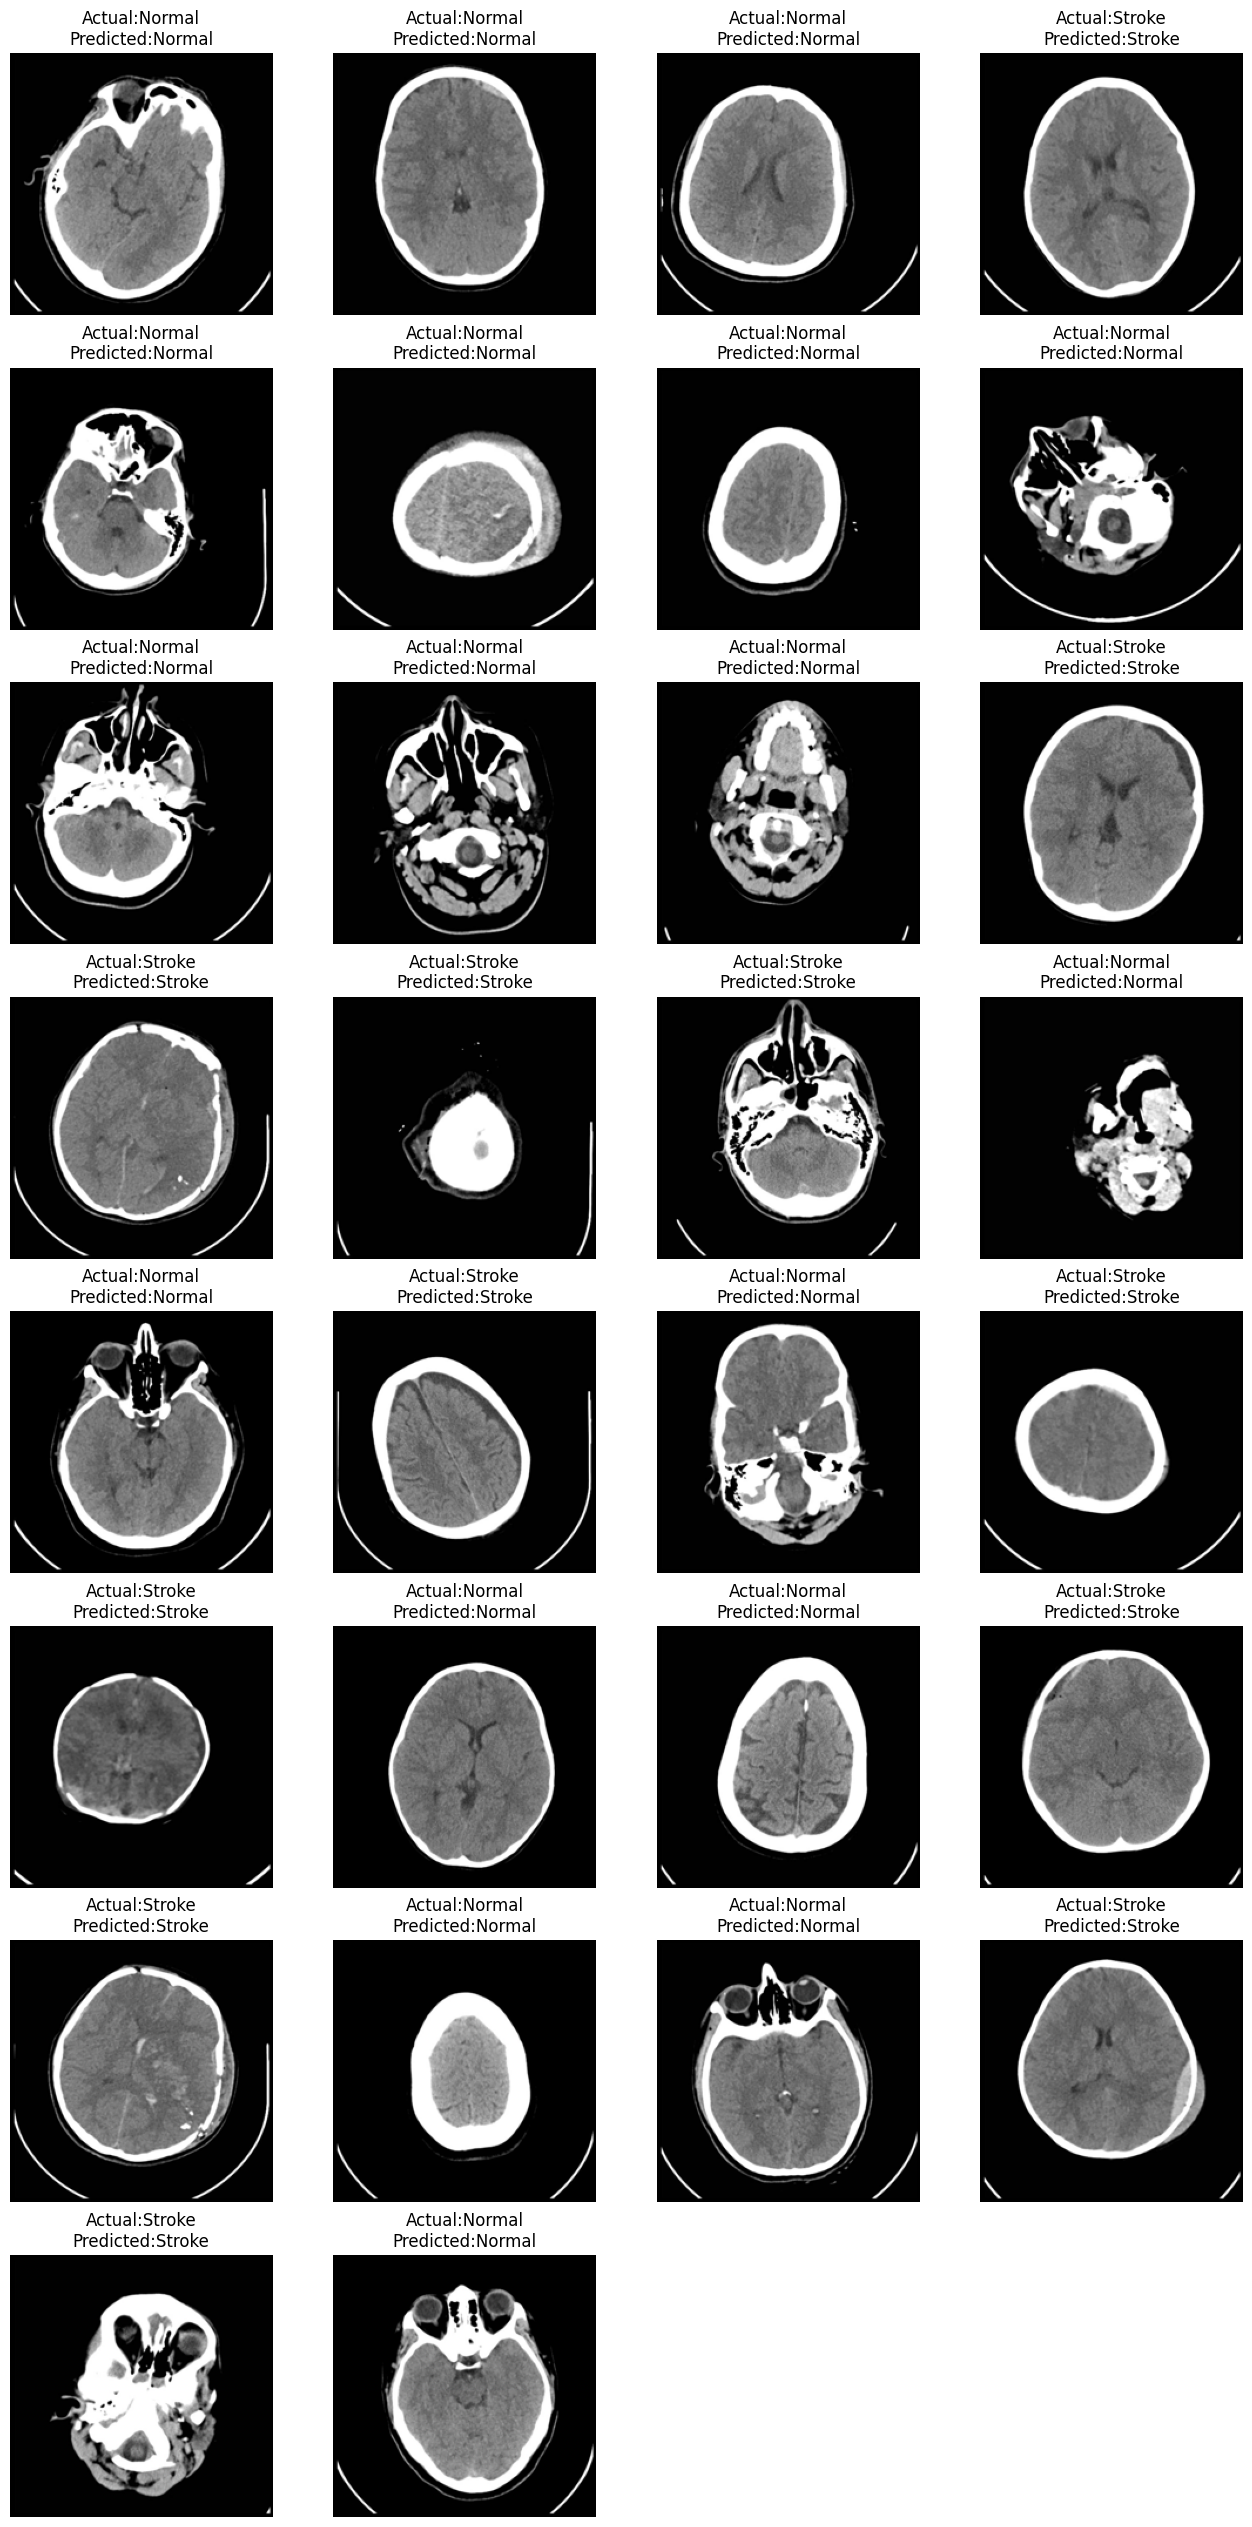

In [18]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")